In [56]:
from layer import tanh, linear_layer, sigmoid
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# Data Generation
def generate_linear(n= 100):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0] - pt[1]) / 1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return  np.array(inputs), np.array(labels).reshape(n, 1)


def generate_XOR_easy():
    inputs = []
    labels = []

    for i in range(11):
        inputs.append([0.1 *i, 0.1 * i])
        labels.append(0)

        if 0.1 * i == 0.5:
            continue

        inputs.append([0.1 * i, 1 - 0.1 * i])
        labels.append(1)
    
    return  np.array(inputs), np.array(labels).reshape(21, 1)

In [58]:

def show_result(x, y, pred_y):
    plt.subplot(1, 2, 1)
    plt.title("Ground truth", fontsize= 18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], "ro")
        else:
            plt.plot(x[i][0], x[i][1], "bo")

    plt.subplot(1, 2, 2)
    plt.title("Predict result", fontsize= 18)
    for i in range(x.shape[0]):
        if pred_y[i] == 0:
            plt.plot(x[i][0], x[i][1], "ro")
        else:
            plt.plot(x[i][0], x[i][1], "bo")
    
    plt.show()

In [59]:
class linear_model:
    def __init__(self, in_features, out_features):
        # hidden layer 1
        self.linear_1 = linear_layer(in_features, 2)
        # hidden layer 2
        self.linear_2 = linear_layer(2, 2)
        # hidden layer 3
        self.linear_3 = linear_layer(2, out_features)
        self.ac_tanh = tanh()
        self.ac_sigmoid  = sigmoid() 
    
    def __call__(self, x):
        return self.forward(x)

    def forward(self, x):
        x = self.linear_1(x)
        x = self.ac_sigmoid(x)
        x = self.linear_2(x)
        x = self.ac_sigmoid(x)
        x = self.linear_3(x)
        return self.ac_sigmoid(x)
        
    
    def backward(self, x):
        
        grad_a3 = x
        grad_z3 = self.ac_sigmoid.derivative(self.linear_3.z) * grad_a3 
        
        grad_a2 = np.matmul(grad_z3, self.linear_3.weight)
        grad_z2 = self.ac_sigmoid.derivative(self.linear_2.z) * grad_a2

        grad_a1 = np.matmul(grad_z2, self.linear_2.weight)
        grad_z1 = self.ac_sigmoid.derivative(self.linear_1.z) * grad_a1 

        self.linear_3.weight_grad = np.matmul(self.linear_3.a.T, grad_z3)
        self.linear_3.bias_grad = np.sum(grad_z3, axis= 0)
        
        self.linear_2.weight_grad = np.matmul(self.linear_2.a.T, grad_z2)
        self.linear_2.bias_grad = np.sum(grad_z2, axis= 0)

        self.linear_1.weight_grad = np.matmul(self.linear_1.a.T, grad_z1)
        self.linear_1.bias_grad = np.sum(grad_z1, axis= 0)

    def update(self, lr= 1e-4):
        self.linear_3.update(lr)
        self.linear_2.update(lr)
        self.linear_1.update(lr)

In [60]:
def train(model, x, y, config):

    epoch = config["epoch"]
    lr = config["learning_rate"]

    for i in range(epoch):
        # prediction
        pred = model(x)
        
        # MSE loss
        MSE_loss = ((pred - y) ** 2).mean()
        if (i + 1) % 5000 == 0:
            print(f"Epoch: {i + 1}, Loss: {MSE_loss}")
        # cal
        grad_y = -2 * (y - pred)
        model.backward(grad_y)
        model.update(lr= lr)

    return model

In [61]:
def test(model, x, y):
    pred = model(x)
    loss = ((pred - y) ** 2).mean()
    correct_cnt = 0
    for i, (y_pred, y_true) in enumerate(zip(pred, y)):
        print("Iter{} |  Ground Truth: {:.1f} | Prediction: {:.5f} |".format(i, y_true[0], y_pred[0]))
        if(np.around(y_pred, 0) == y_true):
            correct_cnt += 1

    print("loss={:.8f} accuracy={:.2%}".format(loss, correct_cnt / len(y)))
    show_result(x, y, np.around(pred,0))

In [62]:
# hyperparameter
config = {
    "epoch" : 100000,
    "learning_rate" : 1e-3
}

In [63]:
model1 = linear_model(2, 1) 

In [64]:
# Training
x, y = generate_linear(n = 500)
model1 = train(model1, x, y, config)

Epoch: 5000, Loss: 0.013251402384164232
Epoch: 10000, Loss: 0.006059049392637661
Epoch: 15000, Loss: 0.004076606730047415
Epoch: 20000, Loss: 0.0030849648155787
Epoch: 25000, Loss: 0.0024794353361676773
Epoch: 30000, Loss: 0.0020694628906029015
Epoch: 35000, Loss: 0.001773619639284307
Epoch: 40000, Loss: 0.0015505669369159634
Epoch: 45000, Loss: 0.0013768358176790584
Epoch: 50000, Loss: 0.001238026954243646
Epoch: 55000, Loss: 0.0011247916722547542
Epoch: 60000, Loss: 0.001030794219691015
Epoch: 65000, Loss: 0.0009515932363843613
Epoch: 70000, Loss: 0.0008839887083764383
Epoch: 75000, Loss: 0.0008256215844494665
Epoch: 80000, Loss: 0.0007747184159992778
Epoch: 85000, Loss: 0.0007299231168525792
Epoch: 90000, Loss: 0.0006901830640573099
Epoch: 95000, Loss: 0.0006546701770476464
Epoch: 100000, Loss: 0.0006227251210676546


Iter0 |  Ground Truth: 0.0 | Prediction: 0.00004 |
Iter1 |  Ground Truth: 0.0 | Prediction: 0.00003 |
Iter2 |  Ground Truth: 1.0 | Prediction: 0.99999 |
Iter3 |  Ground Truth: 1.0 | Prediction: 0.99999 |
Iter4 |  Ground Truth: 0.0 | Prediction: 0.00011 |
Iter5 |  Ground Truth: 0.0 | Prediction: 0.00005 |
Iter6 |  Ground Truth: 0.0 | Prediction: 0.00007 |
Iter7 |  Ground Truth: 0.0 | Prediction: 0.00003 |
Iter8 |  Ground Truth: 0.0 | Prediction: 0.00003 |
Iter9 |  Ground Truth: 0.0 | Prediction: 0.00006 |
Iter10 |  Ground Truth: 1.0 | Prediction: 0.99990 |
Iter11 |  Ground Truth: 1.0 | Prediction: 0.99999 |
Iter12 |  Ground Truth: 0.0 | Prediction: 0.00003 |
Iter13 |  Ground Truth: 1.0 | Prediction: 0.99999 |
Iter14 |  Ground Truth: 1.0 | Prediction: 0.99999 |
Iter15 |  Ground Truth: 1.0 | Prediction: 0.99995 |
Iter16 |  Ground Truth: 0.0 | Prediction: 0.00004 |
Iter17 |  Ground Truth: 0.0 | Prediction: 0.00003 |
Iter18 |  Ground Truth: 1.0 | Prediction: 0.99998 |
Iter19 |  Ground Truth

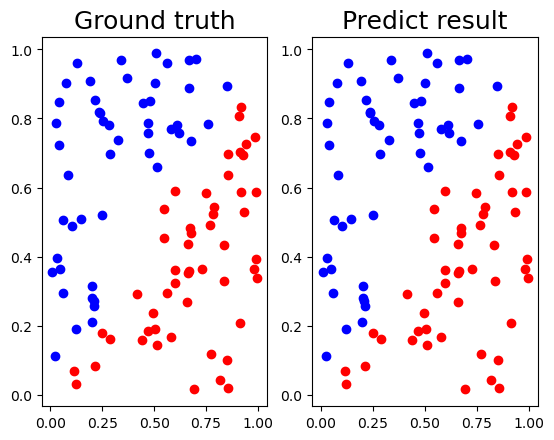

In [65]:
# Testing
x, y = generate_linear(n= 100)
test(model1, x, y)


In [77]:
class linear_model:
    def __init__(self, in_features, out_features):
        # hidden layer 1
        self.linear_1 = linear_layer(in_features, 2)
        # hidden layer 2
        self.linear_2 = linear_layer(2, 2)
        # hidden layer 3
        self.linear_3 = linear_layer(2, out_features)
        self.ac_tanh = tanh()
    
    def __call__(self, x):
        return self.forward(x)

    def forward(self, x):
        x = self.linear_1(x)
        x = self.ac_tanh(x)
        x = self.linear_2(x)
        x = self.ac_tanh(x)
        x = self.linear_3(x)
        return x
    
    def backward(self, x):
        
        grad_a3 = x
        grad_z3 = grad_a3
        
        grad_a2 = np.matmul(grad_z3, self.linear_3.weight)
        grad_z2 = self.ac_tanh.derivative(self.linear_2.z) * grad_a2

        grad_a1 = np.matmul(grad_z2, self.linear_2.weight)
        grad_z1 = self.ac_tanh.derivative(self.linear_1.z) * grad_a1 

        self.linear_3.weight_grad = np.matmul(self.linear_3.a.T, grad_z3)
        self.linear_3.bias_grad = np.sum(grad_z3, axis= 0)
        
        self.linear_2.weight_grad = np.matmul(self.linear_2.a.T, grad_z2)
        self.linear_2.bias_grad = np.sum(grad_z2, axis= 0)

        self.linear_1.weight_grad = np.matmul(self.linear_1.a.T, grad_z1)
        self.linear_1.bias_grad = np.sum(grad_z1, axis= 0)

    def update(self, lr= 1e-4):
        self.linear_3.update(lr)
        self.linear_2.update(lr)
        self.linear_1.update(lr)

In [78]:
model2 = linear_model(2, 1) 

In [79]:
# Training
x, y = generate_XOR_easy()
model2 = train(model2, x, y, config)

Epoch: 5000, Loss: 0.17549402971264957
Epoch: 10000, Loss: 0.0064820916240842085
Epoch: 15000, Loss: 0.001879127307356401
Epoch: 20000, Loss: 0.001002798009100252
Epoch: 25000, Loss: 0.0006637206374150697
Epoch: 30000, Loss: 0.0004888901727148051
Epoch: 35000, Loss: 0.0003836932675514548
Epoch: 40000, Loss: 0.00031399491447167677
Epoch: 45000, Loss: 0.00026467727384944226
Epoch: 50000, Loss: 0.00022807495807842395
Epoch: 55000, Loss: 0.00019990828780307743
Epoch: 60000, Loss: 0.0001776089514844204
Epoch: 65000, Loss: 0.00015954656421390037
Epoch: 70000, Loss: 0.0001446385003296081
Epoch: 75000, Loss: 0.00013213886436216492
Epoch: 80000, Loss: 0.00012151770374568034
Epoch: 85000, Loss: 0.00011238855046637682
Epoch: 90000, Loss: 0.00010446319940839352
Epoch: 95000, Loss: 9.752251380649744e-05
Epoch: 100000, Loss: 9.13970176940064e-05


Iter0 |  Ground Truth: 0.0 | Prediction: 0.00037 |
Iter1 |  Ground Truth: 1.0 | Prediction: 1.00073 |
Iter2 |  Ground Truth: 0.0 | Prediction: 0.00032 |
Iter3 |  Ground Truth: 1.0 | Prediction: 1.00097 |
Iter4 |  Ground Truth: 0.0 | Prediction: 0.00029 |
Iter5 |  Ground Truth: 1.0 | Prediction: 1.00177 |
Iter6 |  Ground Truth: 0.0 | Prediction: 0.00027 |
Iter7 |  Ground Truth: 1.0 | Prediction: 1.00554 |
Iter8 |  Ground Truth: 0.0 | Prediction: 0.00025 |
Iter9 |  Ground Truth: 1.0 | Prediction: 0.99012 |
Iter10 |  Ground Truth: 0.0 | Prediction: 0.00024 |
Iter11 |  Ground Truth: 0.0 | Prediction: 0.00025 |
Iter12 |  Ground Truth: 1.0 | Prediction: 0.96181 |
Iter13 |  Ground Truth: 0.0 | Prediction: 0.00026 |
Iter14 |  Ground Truth: 1.0 | Prediction: 1.00692 |
Iter15 |  Ground Truth: 0.0 | Prediction: 0.00028 |
Iter16 |  Ground Truth: 1.0 | Prediction: 1.00939 |
Iter17 |  Ground Truth: 0.0 | Prediction: 0.00032 |
Iter18 |  Ground Truth: 1.0 | Prediction: 1.00973 |
Iter19 |  Ground Truth

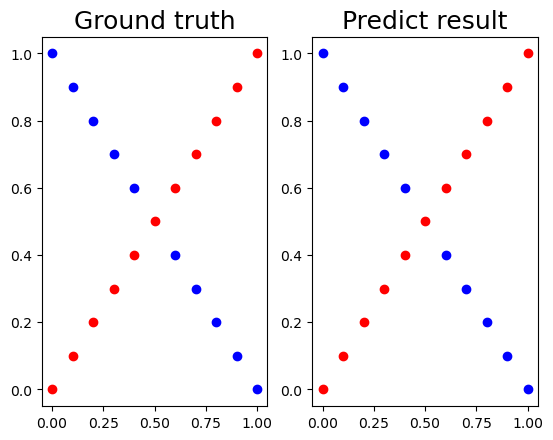

In [80]:
# Testing
x, y = generate_XOR_easy()
test(model2, x, y)